## Clasificación de imágenes

In [39]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam


In [40]:
labels = os.listdir("PokemonData")
num = len(labels)
print(labels)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

In [41]:
stored = {}
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            
#             print(os.path.join(folder,image))
            try:
                img=load_img(os.path.join(folder,image), target_size=(150,150))
                img=img_to_array(img)
                img=img/255.0
                dataset.append((img,count))
            except:
                pass

        print(f'\rCompleted: {label}',end='')
        stored[label] = count
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)

In [42]:
X, y = input_target_split("PokemonData", labels)

Completed: Zubatstuffdslash

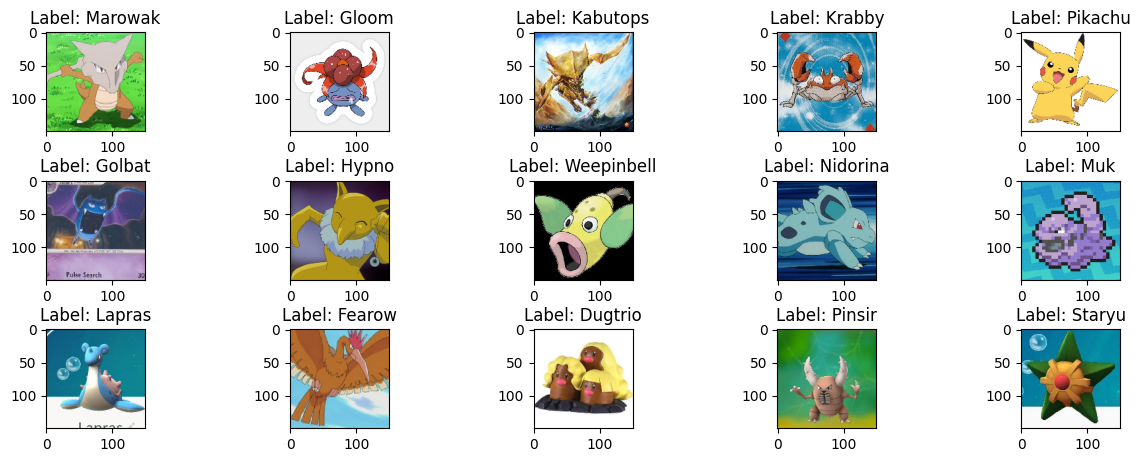

In [43]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

In [44]:
np.unique(y)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149]), array([31, 28, 20, 36, 29, 25, 37, 25, 33, 33, 29, 19, 31, 36, 27, 38, 40,
       31, 36, 34, 36, 30, 32, 30, 29, 28, 36, 34, 23, 36, 41, 35, 30, 33,
       41, 34

In [52]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

In [8]:
y_train = np.eye(num)[y_train]
y_test = np.eye(num)[y_test]

In [46]:
img_size = 150
base_model = VGG16(include_top = False,
                         weights = 'imagenet',
                         input_shape = (img_size,img_size,3))
base_model.trainable = False

In [47]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(150, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [48]:
filepath= "model_pokemon.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00001)

callbacks_list = [
        checkpoint,
        early_stopping,
        learning_rate_reduction
    ]

In [54]:
from tensorflow.keras.utils import to_categorical
# Convertir las etiquetas a formato categórico
y_train = to_categorical(y_train, num_classes=150)
y_test = to_categorical(y_test, num_classes=150)

# Crear generadores de datos
datagen = ImageDataGenerator(rescale=1.0/255.0,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

testgen = ImageDataGenerator(rescale=1.0/255.0)

# Ajustar los generadores a los datos
datagen.fit(X_train)
testgen.fit(X_test)

In [55]:
hist = model.fit(datagen.flow(X_train,y_train,batch_size=32),
                                        validation_data=testgen.flow(X_test,y_test,batch_size=32),
                                        epochs=50)

Epoch 1/50


AttributeError: 'NoneType' object has no attribute 'items'

In [15]:
y_pred = model.predict(X_test)
pred = np.argmax(y_pred,axis=1)
print(pred)

20/20 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step
[14 25 28 21 37 26 45 44  0 21 35  4 18 32 10 28 47  5 34 13 37 20 45 10
 48 27 17 18  9 30 42 15  1  7 46  9  8 15 22 22 25 18 30 21  3  5 35 28
 15 10 35 41 21 17  3  9 18 21 28 36 27 47 45 30  0 45 11  4 47 15 29 12
 15 15 40 31 46 14 30 12 22 17 16 31 35  7 29 21 20 30 48 33 31 28 14 15
 47 44 21 10  7 11 37 43  0 39 15  6 24 33 35 17  2 21  7 13  3 49 36 42
  7 10 27  6 36 39 37 45  6 47 37 12 48 30 38 20 27 37 13 34 48 34 14 32
 27 39 45  8 26 24 35 38 47 44  5 17 32 48 38  0  9  8 37 26 48 45 34  9
 13 32  9 47 45  6 29 35 36  4 39 27  8  1 43 19 30 47 29 20 35  2 14 40
 31 17  5 48  4 25 13 39 19 44 13  1 41 15 35 21 36  6 14  8 27 45 36 29
 15 37 27 22 43 30 35 14  6 42  6 41 41  0 16  2 11 37 48 14 20  0 42  0
 15 21 37 23 10 38 42 11 34 29 19 10  8  7 21 35  3  7 28 48 48 42 33 34
 21 37 16 38  6 30 31 39 39 18  8 30 18 14 44 40 40 29 36  2 22 48 37  3
 40 41 20  1 16 24  9 33 37  4 24 27  0  1 15 29 48 17 12 29 23 27 42 15
 43 21 13 28

In [16]:
ground = np.argmax(y_test,axis=1)

In [34]:
len(unique_classes)

50

In [36]:
from sklearn.metrics import classification_report

print(classification_report(ground,pred,target_names = labels[:50]))

                  precision    recall  f1-score   support

            Abra       0.69      0.75      0.72        12
      Aerodactyl       0.62      0.56      0.59         9
        Alakazam       0.64      0.78      0.70         9
Alolan Sandslash       0.91      0.67      0.77        15
           Arbok       0.75      1.00      0.86         6
        Arcanine       0.50      0.56      0.53         9
        Articuno       0.64      0.82      0.72        11
        Beedrill       0.85      1.00      0.92        11
      Bellsprout       0.87      0.87      0.87        15
       Blastoise       0.94      0.94      0.94        16
       Bulbasaur       0.92      0.92      0.92        13
      Butterfree       1.00      0.75      0.86         8
        Caterpie       1.00      0.90      0.95        10
         Chansey       0.80      0.80      0.80        15
       Charizard       0.27      0.40      0.32        10
      Charmander       0.64      0.88      0.74        16
      Charmel

In [19]:
y_pred

array([[5.18882531e-04, 5.22268354e-04, 7.94771131e-06, ...,
        1.76710557e-08, 6.11305939e-09, 8.68429773e-10],
       [2.91569009e-08, 6.70856508e-08, 5.03685937e-09, ...,
        8.24587482e-11, 7.45788931e-10, 3.65941964e-11],
       [8.57940829e-10, 2.94707725e-08, 2.44669519e-13, ...,
        6.56548167e-12, 5.66405145e-09, 6.88723939e-11],
       ...,
       [2.54322833e-04, 4.32593566e-07, 5.20027788e-06, ...,
        2.34908981e-09, 5.78698287e-12, 3.63700563e-11],
       [3.06400796e-03, 1.06891086e-04, 1.13683447e-04, ...,
        3.19781996e-08, 2.17931500e-07, 2.68179843e-08],
       [9.87816904e-08, 9.31924315e-10, 4.39085590e-13, ...,
        1.09366023e-14, 2.51984441e-14, 2.29903080e-15]], dtype=float32)

In [20]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([14, 25, 28, 21, 37, 26, 45, 44,  0, 21, 35,  4, 18, 32, 10, 28, 47,
        5, 34, 13, 37, 20, 45, 10, 48, 27, 17, 18,  9, 30, 42, 15,  1,  7,
       46,  9,  8, 15, 22, 22, 25, 18, 30, 21,  3,  5, 35, 28, 15, 10, 35,
       41, 21, 17,  3,  9, 18, 21, 28, 36, 27, 47, 45, 30,  0, 45, 11,  4,
       47, 15, 29, 12, 15, 15, 40, 31, 46, 14, 30, 12, 22, 17, 16, 31, 35,
        7, 29, 21, 20, 30, 48, 33, 31, 28, 14, 15, 47, 44, 21, 10,  7, 11,
       37, 43,  0, 39, 15,  6, 24, 33, 35, 17,  2, 21,  7, 13,  3, 49, 36,
       42,  7, 10, 27,  6, 36, 39, 37, 45,  6, 47, 37, 12, 48, 30, 38, 20,
       27, 37, 13, 34, 48, 34, 14, 32, 27, 39, 45,  8, 26, 24, 35, 38, 47,
       44,  5, 17, 32, 48, 38,  0,  9,  8, 37, 26, 48, 45, 34,  9, 13, 32,
        9, 47, 45,  6, 29, 35, 36,  4, 39, 27,  8,  1, 43, 19, 30, 47, 29,
       20, 35,  2, 14, 40, 31, 17,  5, 48,  4, 25, 13, 39, 19, 44, 13,  1,
       41, 15, 35, 21, 36,  6, 14,  8, 27, 45, 36, 29, 15, 37, 27, 22, 43,
       30, 35, 14,  6, 42

In [21]:
y_true = np.argmax(y_test,axis=1)
y_true

array([27, 25, 28, 21, 37, 26, 17, 26,  5, 44, 35, 12, 18, 32, 10, 28, 47,
       38, 34, 13,  6, 20, 45, 10, 48, 27, 17, 23,  9, 30, 42, 15,  1,  7,
       46,  9,  8, 15, 22, 22, 25, 18, 30, 21,  3, 24, 35, 28, 37, 10, 43,
       41, 21, 17,  3,  9, 18, 27, 21, 36, 14, 47, 45, 30,  0, 45, 11,  4,
       47, 15, 48, 12, 15, 15, 40, 31, 46, 44, 30, 12, 22, 17, 16, 31, 35,
        7, 29, 15, 20, 30, 48, 33, 39, 28, 46, 27, 47, 44, 46, 10,  7, 11,
       36, 43,  0, 39, 28,  6, 24, 38, 35, 17,  2, 21,  7, 22,  3, 49, 36,
       42,  7, 10, 27,  6, 36, 39, 37,  1,  6, 47, 37, 12, 48, 30, 38, 20,
       27, 37, 13, 34, 49, 34, 27, 32, 14, 39, 19,  8, 26, 44, 13, 38, 47,
       44,  5,  1, 32, 48, 38,  0,  9,  8, 37, 26, 48, 18, 34,  9, 13, 32,
        9, 47, 45, 38, 29, 35, 36, 26, 39, 16,  8, 16, 43, 33, 30, 47, 29,
       20, 35,  2,  5, 40, 31, 17,  5, 48,  4, 25, 13, 39, 19, 44, 13,  1,
       39, 15, 35, 14, 36,  6, 27,  8, 27, 45, 36, 29, 15, 37,  5, 22, 43,
       30, 35, 35,  6, 42

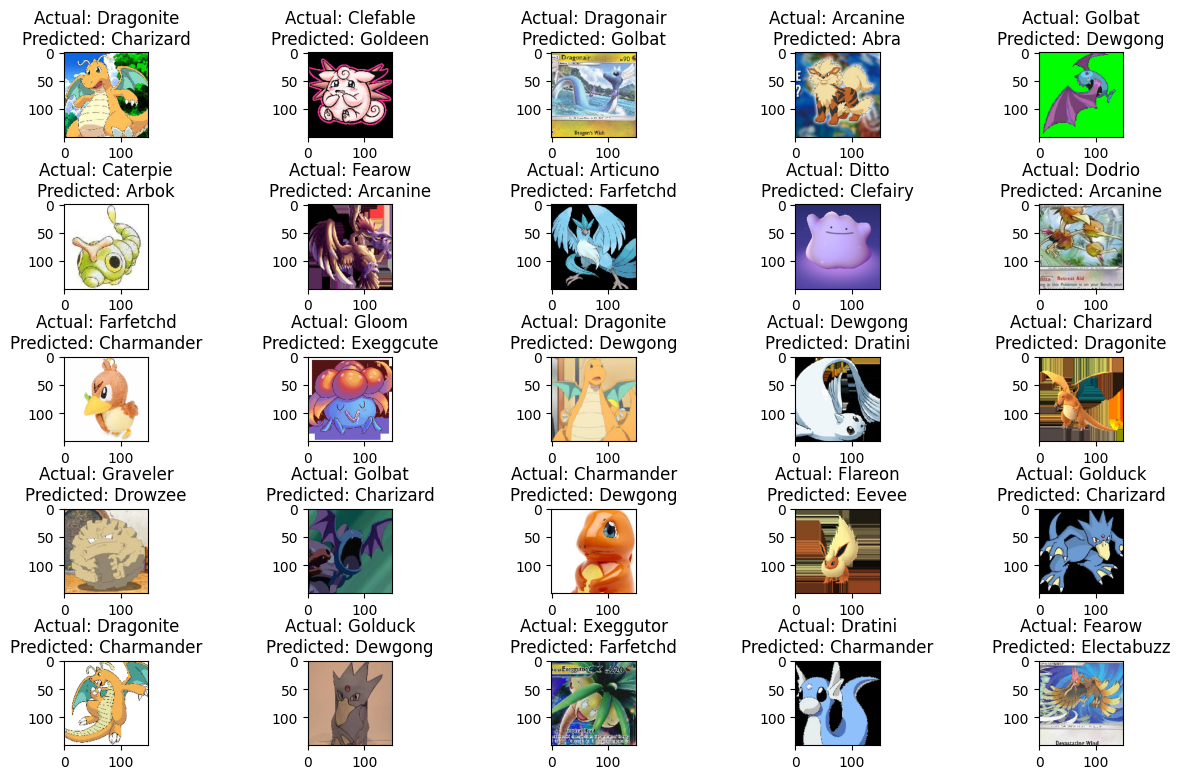

In [22]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(len(X_test)):
    if y_pred[i] != y_true[i]:
        n+=1
        if n <= 25:
            plt.subplot(5 , 5, n)
            plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
            plt.imshow(X_test[i])
            plt.title(f'Actual: {labels[y_true[i]]}\nPredicted: {labels[y_pred[i]]}')